# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
import datetime
url = "http://api.openweathermap.org/data/2.5/weather?&APPID="+weather_api_key

# Define an empty list to fetch the weather data for each city

city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Log the url, record, and set numbers
print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

# Add 1 to the record count
record_count += 1

for i,city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    city_url = f"{url}&q={city}"

    
    try:
        response = requests.get(f"{city_url}").json() 
        city_weather = response["weather"]
        city_coord =response["coord"]
        for i in city_coord:
            if i == "lon":
                city_lat = city_coord[i]
            if i == "lat":
                city_lng = city_coord[i] 
        city_temp = response["main"]
        for i in city_temp:
            if i == "temp_max":
                city_max_temp = city_temp[i]
            if i == "humidity":
                city_humidity = city_temp[i]
        clouds = response["clouds"]
        for i in clouds:
            if i == "all":
                city_clouds = clouds[i]                      
        wind = response["wind"]
        for i in wind:
            if i == "speed":
                city_wind = wind[i]
        sys = response["sys"]
        for i in sys:
            if i == "country":
                city_country = sys[i]       
        city_date = datetime.datetime.fromtimestamp(response["dt"]).strftime('%Y-%m-%d')
                   
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
      # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping..

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-68.3000,-54.8000,276.96,93,100,1.54,AR,2023-04-24
1,hithadhoo,73.0833,-0.6000,302.13,75,99,3.95,MV,2023-04-24
2,albany,-73.9662,42.6001,285.14,50,88,2.82,US,2023-04-24
3,clyde river,-68.5914,70.4692,268.28,93,75,7.72,CA,2023-04-24
4,saint-francois,3.9054,46.4154,283.13,83,100,2.06,FR,2023-04-24


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-68.3000,-54.8000,276.96,93,100,1.54,AR,2023-04-24
1,hithadhoo,73.0833,-0.6000,302.13,75,99,3.95,MV,2023-04-24
2,albany,-73.9662,42.6001,285.14,50,88,2.82,US,2023-04-24
3,clyde river,-68.5914,70.4692,268.28,93,75,7.72,CA,2023-04-24
4,saint-francois,3.9054,46.4154,283.13,83,100,2.06,FR,2023-04-24


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

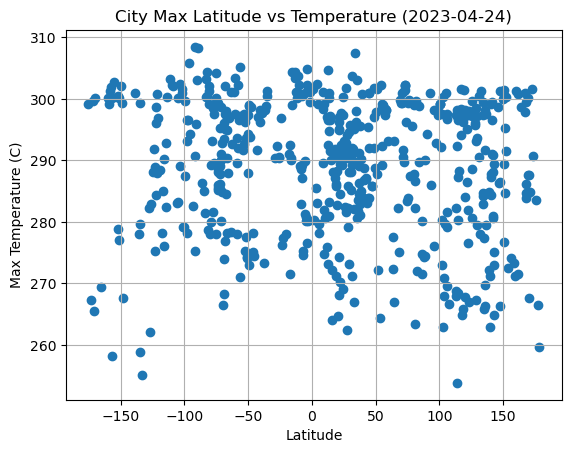

In [8]:
# Build scatter plot for latitude vs. temperature
import matplotlib.pyplot as plt

# Incorporate the other graph properties
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])
date_time = datetime.datetime.now().strftime('%Y-%m-%d')

plt.title(f"City Max Latitude vs Temperature ({date_time})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


#### Latitude Vs. Humidity

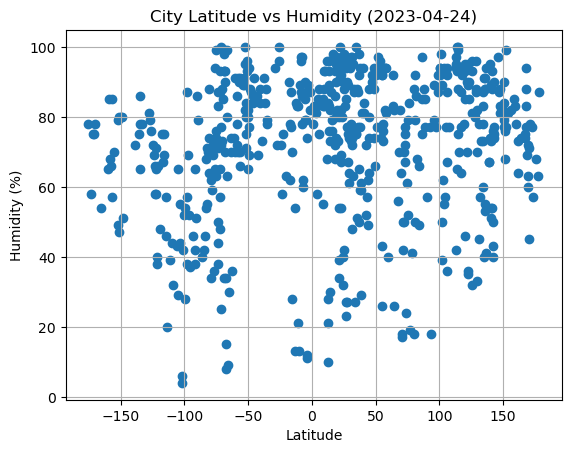

In [9]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({date_time})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

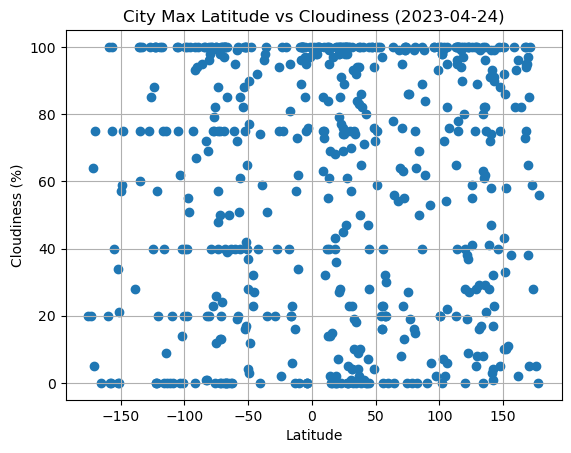

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

plt.title(f"City Max Latitude vs Cloudiness ({date_time})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

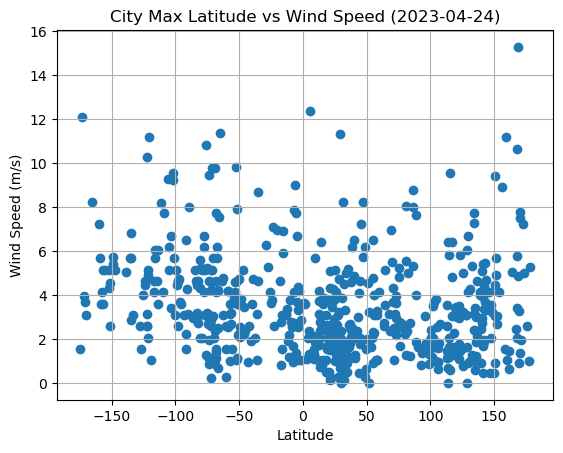

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

plt.title(f"City Max Latitude vs Wind Speed ({date_time})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_lin_reg(x,y, xlabel="",ylabel=""):
    # slope and intercept

    coeffs = np.polyfit(x, y, 1)
    slope = coeffs[0]
    intercept = coeffs[1]
    r = np.corrcoef(x, y)[0, 1]
  
    predict = slope*x + intercept
    
    plt.scatter(x,y)
    plt.plot(x, predict, color='red')

    line_eq = f'y = {slope: .2f}x + {intercept: .2f}'
    plt.text(0.05,0.05, line_eq, transform=plt.gca().transAxes, color='red', fontsize=15)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    
    plt.show()

    return f"The r-value is: {r}"

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hithadhoo,73.0833,-0.6000,302.13,75,99,3.95,MV,2023-04-24
4,saint-francois,3.9054,46.4154,283.13,83,100,2.06,FR,2023-04-24
7,marsa matruh,27.2453,31.3525,291.26,77,0,3.09,EG,2023-04-24
10,khatanga,102.5000,71.9667,262.96,93,7,3.68,RU,2023-04-24
14,busselton,115.3333,-33.6500,288.32,70,100,9.54,AU,2023-04-24


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-68.3000,-54.8000,276.96,93,100,1.54,AR,2023-04-24
2,albany,-73.9662,42.6001,285.14,50,88,2.82,US,2023-04-24
3,clyde river,-68.5914,70.4692,268.28,93,75,7.72,CA,2023-04-24
5,port-cartier,-66.8654,50.0334,278.27,80,39,4.19,CA,2023-04-24
6,laguna,-121.4238,38.4210,300.73,40,0,2.06,US,2023-04-24


###  Temperature vs. Latitude Linear Regression Plot

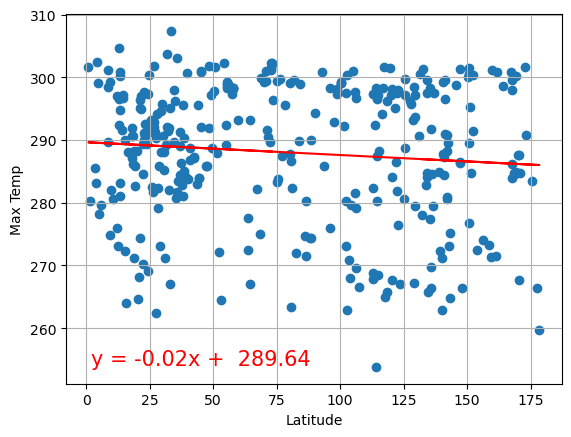

'The r-value is: -0.09552571816542099'

In [26]:
# Linear regression on Northern Hemisphere

plot_lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],xlabel="Latitude",ylabel="Max Temp")

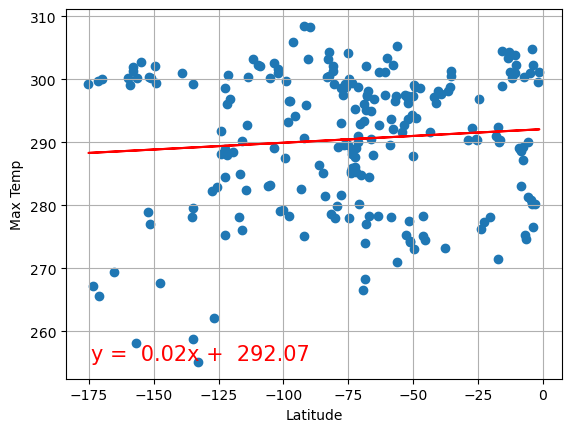

'The r-value is: 0.08700285021911333'

In [27]:
# Linear regression on Southern Hemisphere
plot_lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],xlabel="Latitude",ylabel="Max Temp")

**Discussion about the linear relationship:** Maximum temperature is the maximum near to the equator (0 degree latitude) in both the hemispheres. 

### Humidity vs. Latitude Linear Regression Plot

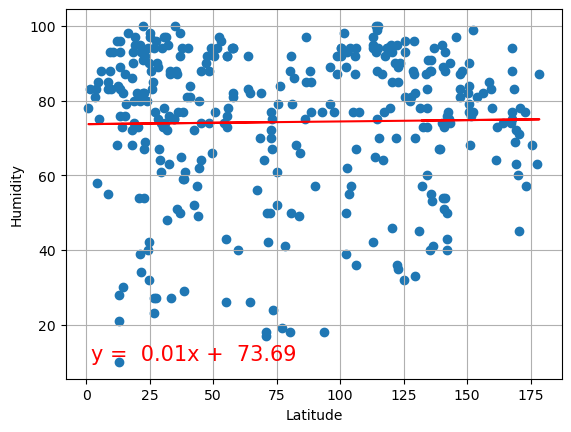

'The r-value is: 0.018707953067241816'

In [28]:
# Northern Hemisphere

plot_lin_reg( northern_hemi_df["Lat"], northern_hemi_df["Humidity"], xlabel="Latitude", ylabel="Humidity")

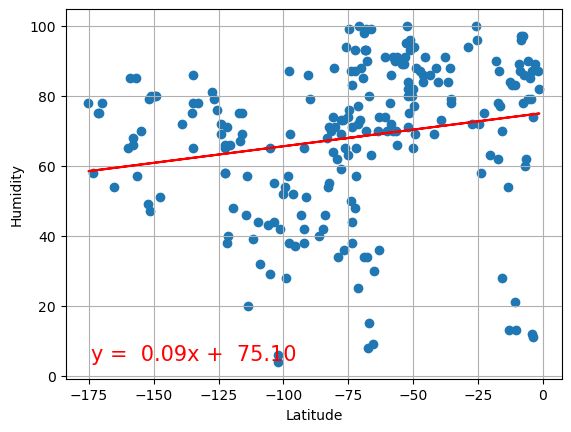

'The r-value is: 0.19050669042000679'

In [29]:
# Southern Hemisphere
plot_lin_reg( southern_hemi_df["Lat"], southern_hemi_df["Humidity"], xlabel="Latitude", ylabel="Humidity")

**Discussion about the linear relationship:** Humidity unlike max temperature , the latitudes away from equator seem to have higher humidity.

### Cloudiness vs. Latitude Linear Regression Plot

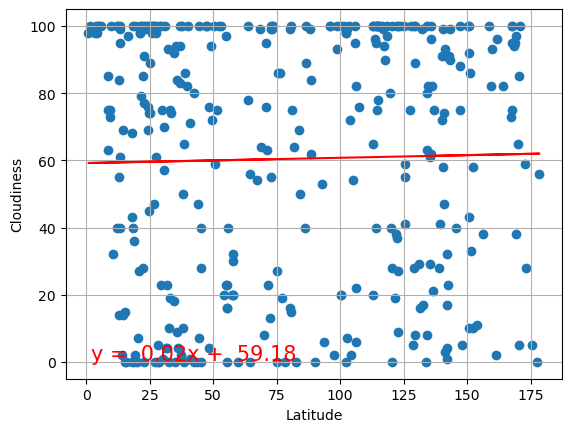

'The r-value is: 0.021567993410580025'

In [31]:
# Northern Hemisphere
plot_lin_reg( northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], xlabel="Latitude", ylabel="Cloudiness")

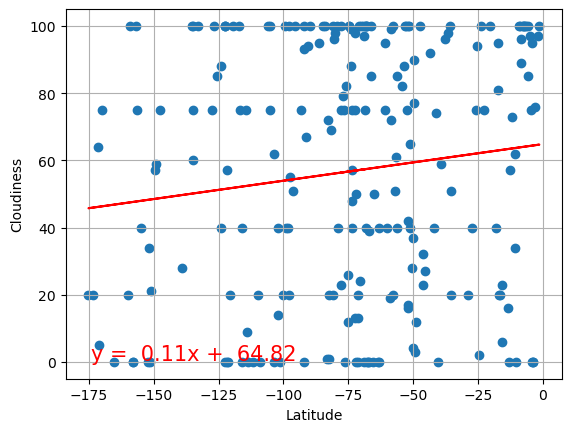

'The r-value is: 0.12599770306144245'

In [32]:
# Southern Hemisphere
plot_lin_reg( southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], xlabel="Latitude", ylabel="Cloudiness")

**Discussion about the linear relationship:** The amount of clouds or cloudiness seems to be evenly distributed between the lower and higher latitudes. This correlation cannot be taken as a basis for any conclusions and it might vary according to max temperaturee and wind spedd and direction on a particular day.

### Wind Speed vs. Latitude Linear Regression Plot

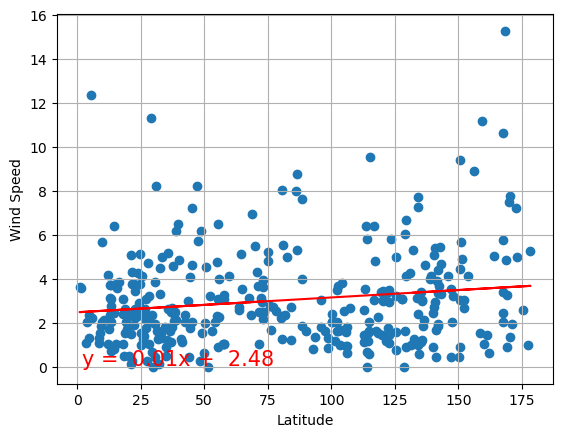

'The r-value is: 0.15818188619387014'

In [33]:
# Northern Hemisphere
plot_lin_reg( northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], xlabel="Latitude", ylabel="Wind Speed")

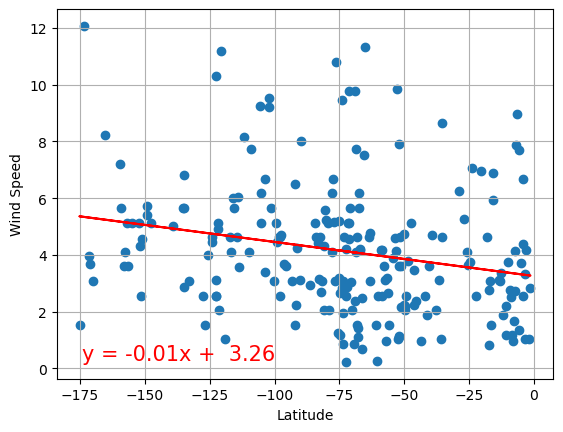

'The r-value is: -0.22654414600522918'

In [34]:
# Southern Hemisphere
plot_lin_reg( southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], xlabel="Latitude", ylabel="Wind Speed")

**Discussion about the linear relationship:** The wind speed is lower near the equator (0 degree latitude ) and higher in the higher latitudes in both the hemispheres.